In [ ]:
#A place for the imports.
from math import sqrt

import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
attributes = [
    'Sex',
    'Length',
    'Diameter',
    'Height',
    'Whole weight',
    'Shucked weight',
    'Viscera weight',
    'Shell weight',
    'Rings'
]

df = pd.read_csv('abalone.data', names=attributes)

df['Age'] = df['Rings']+1.5

df = df.drop(columns=['Rings'])



In [3]:
df.shape

(4177, 9)

In [4]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [5]:
df.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,13.5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Age             4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


In [7]:
y = df[['Age']]
y.head()

,Age
0,16.5
1,8.5
2,10.5
3,11.5
4,8.5


In [8]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


In [9]:
y.loc[y['Age'].idxmax()]

Age    30.5
Name: 480, dtype: float64

In [10]:
y.loc[y['Age'].idxmin()]

Age    2.5
Name: 236, dtype: float64

In [11]:
X = df.drop(y, axis=1)
X.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [12]:
y['Age'].mean()

11.433684462532918

In [13]:
y['Age'].median()

10.5

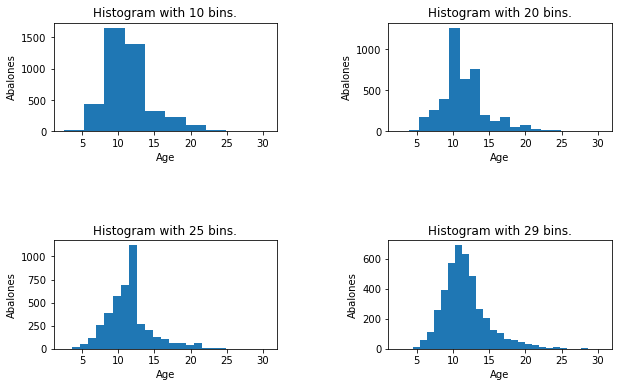

In [14]:
hists_fig = plt.figure(figsize=(10, 6))
hists_fig.subplots_adjust(hspace=1, wspace=0.5)

for i, bins in enumerate([10,20,25,29]):
    target_hist = hists_fig.add_subplot(2, 2, i+1)
    
    target_hist.hist(y['Age'], bins=bins)
    target_hist.set_title('Histogram with %d bins.' % bins)
    target_hist.set_xlabel('Age')
    target_hist.set_ylabel('Abalones')



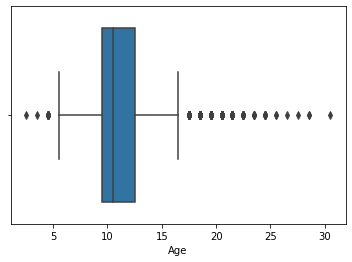

In [15]:
target_boxplot = sns.boxplot(x='Age', data=y[['Age']])

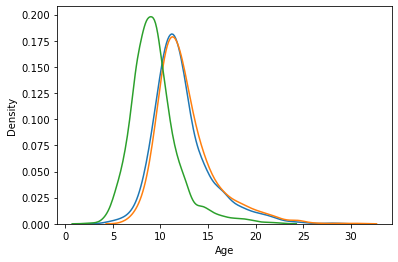

In [16]:
sex_uniques = df['Sex'].unique()

for sex_unique in sex_uniques:
    subset = df[df['Sex']==sex_unique]
    
    sns.kdeplot(subset['Age'], label=sex_unique)



In [17]:
df.corr()['Age'].sort_values()

Shucked weight    0.420884
Viscera weight    0.503819
Whole weight      0.540390
Length            0.556720
Height            0.557467
Diameter          0.574660
Shell weight      0.627574
Age               1.000000
Name: Age, dtype: float64

In [18]:
features = df.copy()

categorical_col = pd.get_dummies(df['Sex'])

features = pd.concat(
    [
        categorical_col,
        features.drop('Sex', axis=1)
    ], 
    axis=1)
features.head()
features.to_csv("D2.csv",index=False,sep=',')


In [19]:
dataset = pd.read_csv('D2.csv')
F = dataset.iloc[:, 0].values
I = dataset.iloc[:, 1].values
M = dataset.iloc[:, 2].values
Diameter = dataset.iloc[:, 3].values
Height = dataset.iloc[:, 4].values
Length = dataset.iloc[:, 5].values
Shell_weight = dataset.iloc[:, 6].values
Shucked_weight = dataset.iloc[:,7].values
Viscera_weight = dataset.iloc[:, 8].values
Whole_weight = dataset.iloc[:, 9].values
Age = dataset.iloc[:, 10].values

def standarize(X):
    ''' 中心化 & 标准化数据 (零均值, 单位标准差)
    '''
    std_deviation = np.std(X, 0)
    mean = np.mean(X, 0)
    return (X - mean)/std_deviation

F1 = standarize(F)
I1 = standarize(I)
M1 = standarize(M)
Diameter1 = standarize(Diameter)
Height1 = standarize(Height)
Length1 = standarize(Length)
Shell_weight1 = standarize(Shell_weight)
Shucked_weight1 = standarize(Shucked_weight)
Viscera_weight1 = standarize(Viscera_weight)
Whole_weight1 = standarize(Whole_weight)
Age1 = standarize(Age)

dataframe = pd.DataFrame({'F':F1,'I':I1,'M':M1,'Diameter':Diameter1,'Height':Height1,'Length':Length1,
                         'Shell_weight':Shell_weight1,'Shucked_weight':Shucked_weight1,'Viscera_weight':Viscera_weight1,
                         'Whole_weight':Whole_weight1,'Age':Age1})#I,M,Diameter,Height,Length,Shell_weight,Shucked_weight,Viscera_weight,Whole_weight,Age})
dataframe.to_csv("D2.csv",index=False,sep=',')


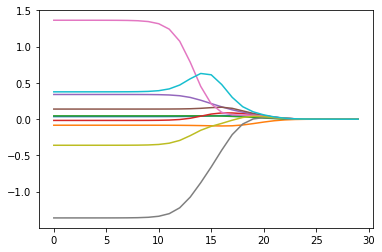

In [20]:
def ridgeRegres(xMat,yMat,lam=0.03):
    xTx = xMat.T*xMat
    denom = xTx + np.eye(np.shape(xMat)[1])*lam
    # 检查行列式是否为零，即矩阵是否可逆，行列式为0的话就不可逆，不为0的话就是可逆。
    if np.linalg.det(denom) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return
    #I为单位矩阵
    ws = np.dot(denom.I , np.dot(xMat.T,yMat))
    return ws
 
def ridgeTest(xArr,yArr):
    xMat = np.mat(xArr); 
    yMat = np.mat(yArr).T
    #计算y的均值
    yMean = np.mean(yMat) # 数据标准化
    # print(yMean)
    yMat = yMat - yMean
    # print(xMat)
    #regularize X's
    xMeans = np.mean(xMat,0)
    xVar = np.var(xMat,0)
    xMat = (xMat - xMeans) / xVar #（特征-均值）/方差
    numTestPts = 30
    wMat = np.zeros((numTestPts,np.shape(xMat)[1]))
    for i in range(numTestPts): # 测试不同的lambda取值，获得系数
        ws = ridgeRegres(xMat,yMat,np.exp(i-10))
        wMat[i,:]=ws.T
    #将所以回归系数输入到一个矩阵并返回
    return wMat

if '__main__' == __name__:
    dataset = pd.read_csv('D2.csv')
    xArr = dataset.iloc[:,:-1].values
    yArr = dataset.iloc[:, 10].values
    # print(xArr,yArr)
    ridgeWeights = ridgeTest(xArr,yArr)
    # print(ridgeWeights)
    plt.plot(ridgeWeights)
    #x轴坐标正则化参数alpha
    #y轴坐标系数w
    #plt.title('岭回归下的岭迹图')
    plt.axis('tight')

    plt.show()

In [21]:
#交叉验证进一步确定可视化值
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge,RidgeCV
#设置交叉验证的参数，对于每个Lambda值，都执行10重交叉验证
Lambdas = np.logspace(-5, 2, 200)
ridge_cv = RidgeCV(alphas = Lambdas, normalize=True, 
                   scoring='neg_mean_squared_error', cv = 10)
xArr = dataset.iloc[:,:-1].values
yArr = dataset.iloc[:, 10].values
ridge_cv.fit(xArr, yArr)
ridge_best_Lambda = ridge_cv.alpha_

print("best lambda",ridge_best_Lambda)



best lambda 0.0001448118227674533


In [68]:
#划分数据集D2为D2_test,D2_train,系数比为2:8
import pandas as pd
from numpy import random
from sklearn.model_selection import train_test_split

def split_dataset():
    df = pd.read_csv('D2.csv', names=attributes)
    x_train, x_test, y_train, y_test = train_test_split(xArr, yArr, test_size=0.2)

    train= np.column_stack((x_train,y_train))
    np.savetxt('D2_train.csv',train, delimiter = ',')

    test = np.column_stack((x_test, y_test))
    np.savetxt('D2_test.csv', test, delimiter = ',')


split_dataset()

In [111]:
df_test = pd.read_csv('D2_test.csv')
x_test = df_test.iloc[:,:-1].values
y_test = df_test.iloc[:, 10].values
df_train = pd.read_csv('D2_train.csv')
x_train = df_train.iloc[:,:-1].values
y_train = df_train.iloc[:, 10].values

def ridgeTest_final(xArr,yArr):
    xMat = np.mat(xArr); 
    yMat = np.mat(yArr).T
    #计算y的均值
    yMean = np.mean(yMat) # 数据标准化
    # print(yMean)
    yMat = yMat - yMean
    # print(xMat)
    #regularize X's
    xMeans = np.mean(xMat,0)
    xVar = np.var(xMat,0)
    xMat = (xMat - xMeans) / xVar #（特征-均值）/方差
    numTestPts = 30
    wMat = np.zeros((numTestPts,np.shape(xMat)[1]))
    i = 0.0001448118227674533
    ws = ridgeRegres(xMat,yMat,i)
    wMat=ws.T
    #将所以回归系数输入到一个矩阵并返回
    return wMat

wMat_ = ridgeTest_final(x_train,y_train)
print(wMat_)



[[ 0.03720883 -0.07905334  0.0415478  -0.03256154  0.35121372  0.13090144
   1.36354761 -1.37909125 -0.35668257  0.40882939]]


In [112]:
#定义MAE
def mae_value(y_true,y_pred):
    n = len(y_true)
    mae = np.sum(np.abs(y_true - y_pred))/n
    return mae

#定义RMSE
def rmse_value(y_true, y_pred):
    n = len(y_true)
    mse = sum(np.square(y_true - y_pred))/n
    rmse = mse.sum()
    rmse = np.sqrt(rmse)
    return rmse    
    

In [118]:
y_predic = wMat_*x_test.T+


In [114]:
def print_result():
    MAE = mae_value(y_test,y_predic)
    print("MAE:",MAE)
    RMSE = rmse_value(y_test,y_predic)
    print("RMSE:",RMSE)

In [115]:
print_result()

MAE: 0.5355551097269028
RMSE: 0.7391747573775522


In [124]:
mae_all = []
rmse_all = []
for circle_ in range (5):
    split_dataset()
    df_test = pd.read_csv('D2_test.csv')
    x_test = df_test.iloc[:,:-1].values
    y_test = df_test.iloc[:, 10].values
    df_train = pd.read_csv('D2_train.csv')
    x_train = df_train.iloc[:,:-1].values
    y_train = df_train.iloc[:, 10].values
    wMat_ = ridgeTest_final(x_train,y_train)
    print_result()
    MAE = mae_value(y_test,y_predic)
    RMSE = rmse_value(y_test,y_predic)
    mae_all.append(MAE)
    rmse_all.append(RMSE)


MAE: 0.8845595710561247
RMSE: 1.1576955507085889
MAE: 0.9261850825304864
RMSE: 1.1768282756267752
MAE: 0.9416986662689973
RMSE: 1.2141849713622286
MAE: 0.9336984256425475
RMSE: 1.1999382352334218
MAE: 0.8874895408639049
RMSE: 1.1472166539258966


<BarContainer object of 5 artists>

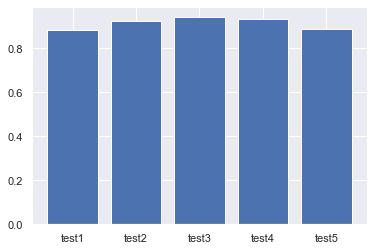

In [129]:
labels = ('test1', 'test2', 'test3', 'test4', 'test5')
plt.bar(labels,mae_all)

<BarContainer object of 5 artists>

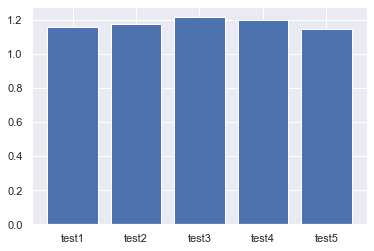

In [128]:
labels = ('test1', 'test2', 'test3', 'test4', 'test5')
plt.bar(labels,rmse_all)